In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Normalization

inputs = Input(shape=(28, 28, 1))
outputs = Normalization()(inputs)
outputs = Conv2D(filters=64, kernel_size=3, activation='relu')(outputs)
outputs = Conv2D(filters=64, kernel_size=3, activation='relu')(outputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Flatten()(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(10, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0     

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='mnist',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=3)
]

model.fit(x_train, y_train, 
          validation_data=(x_val, y_val), 
          epochs=100, batch_size=32, callbacks=callbacks)

Epoch 1/100
1500/1500 [==============================] - 222s 147ms/step - loss: 0.5470 - accuracy: 0.8843 - val_loss: 0.1147 - val_accuracy: 0.9660
Epoch 2/100
1500/1500 [==============================] - 190s 127ms/step - loss: 0.1998 - accuracy: 0.9400 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 3/100
1500/1500 [==============================] - 188s 125ms/step - loss: 0.1582 - accuracy: 0.9516 - val_loss: 0.0708 - val_accuracy: 0.9777
Epoch 4/100
1500/1500 [==============================] - 188s 126ms/step - loss: 0.1401 - accuracy: 0.9582 - val_loss: 0.0704 - val_accuracy: 0.9790
Epoch 5/100
1500/1500 [==============================] - 188s 126ms/step - loss: 0.1269 - accuracy: 0.9614 - val_loss: 0.0695 - val_accuracy: 0.9789
Epoch 6/100
1500/1500 [==============================] - 189s 126ms/step - loss: 0.1200 - accuracy: 0.9635 - val_loss: 0.0640 - val_accuracy: 0.9807
Epoch 7/100
1500/1500 [==============================] - 190s 126ms/step - loss: 0.1080 - accuracy: 0.9668

In [5]:
model.load_weights('mnist')

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 31ms/step - loss: 0.0586 - accuracy: 0.9846


[0.058583006262779236, 0.9846000075340271]

In [7]:
predicted = model.predict(x_test).argmax(axis=1)

In [8]:
y_test = y_test.argmax(axis=1)

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted).round(3)

0.985

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



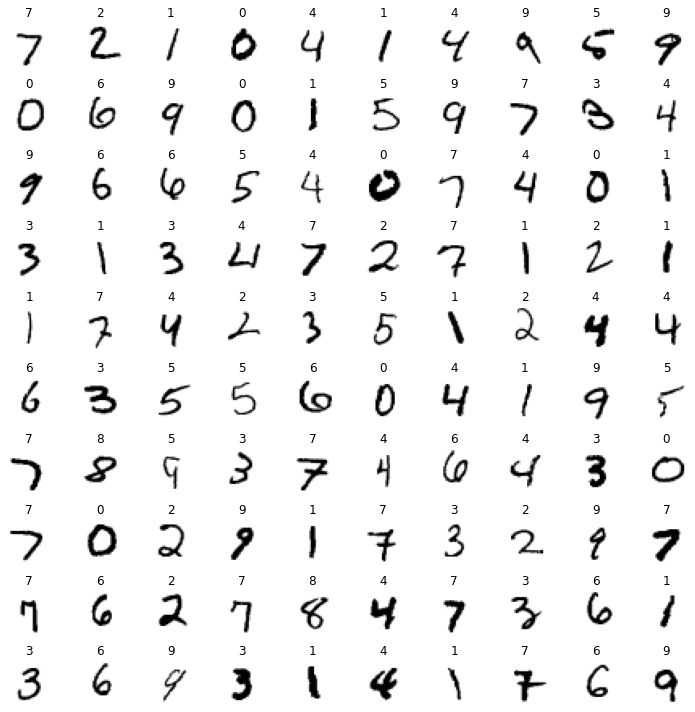

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')
plt.tight_layout()
plt.show()